<a href="https://colab.research.google.com/github/sai-1903/sai-1903/blob/main/Saikiran_Santhpale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("/Customers.csv")
products = pd.read_csv("/Products.csv")
transactions = pd.read_csv("/Transactions.csv")

# Display basic information
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [3]:
# Check for missing values
print("\nMissing values in Customers:")
print(customers.isnull().sum())

print("\nMissing values in Products:")
print(products.isnull().sum())

print("\nMissing values in Transactions:")
print(transactions.isnull().sum())

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for duplicates
print("\nDuplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Transactions:", transactions.duplicated().sum())



Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0


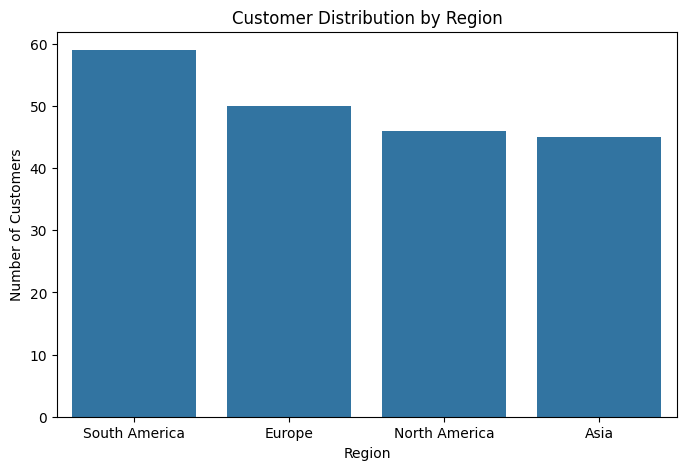

In [4]:
# Region distribution
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()


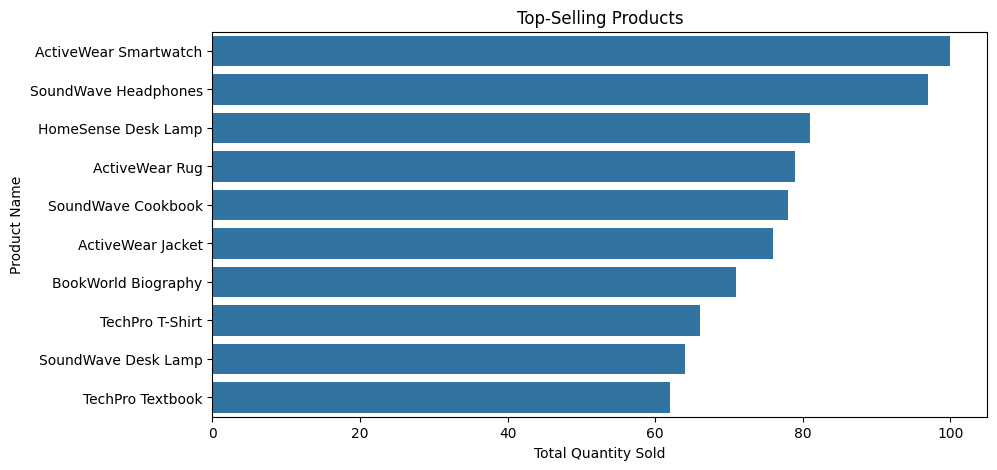

In [5]:
# Merge transactions with products
merged_data = transactions.merge(products, on="ProductID")
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()
